# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# First dataset: Cab_data

In [2]:
cab_data=pd.read_csv("cab_data.csv")

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016 0:00,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016 0:00,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/2016 0:00,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/2016 0:00,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/2016 0:00,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_data.dtypes

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [5]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [6]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [7]:
cab_data["Profit"] = cab_data["Price Charged"] - cab_data["Cost of Trip"]

In [8]:
cab_data["ProfitPerKM"] = cab_data["Profit"] / cab_data["KM Travelled"]

In [9]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,ProfitPerKM
0,10000011,1/8/2016 0:00,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1.882266
1,10000012,1/6/2016 0:00,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,0.826904
2,10000013,1/2/2016 0:00,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,3.049558
3,10000014,1/7/2016 0:00,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,0.777751
4,10000015,1/3/2016 0:00,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,1.929439


In [10]:
AggProf = cab_data.groupby('Company')['Profit'].agg('mean')
print(AggProf)

Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64


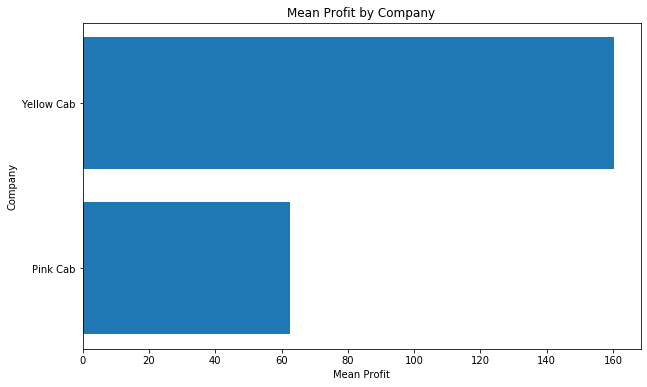

In [11]:
# Sorting the mean profits in ascending order
AggProf = AggProf.sort_values(ascending=True)

# Plotting the mean profits for each company as a horizontal bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
plt.barh(AggProf.index, AggProf.values)
plt.xlabel('Mean Profit')
plt.ylabel('Company')
plt.title('Mean Profit by Company')
plt.show()

In [12]:
AggProfKM = cab_data.groupby('Company')['ProfitPerKM'].agg('mean')
print(AggProfKM)

Company
Pink Cab      2.769908
Yellow Cab    7.105508
Name: ProfitPerKM, dtype: float64


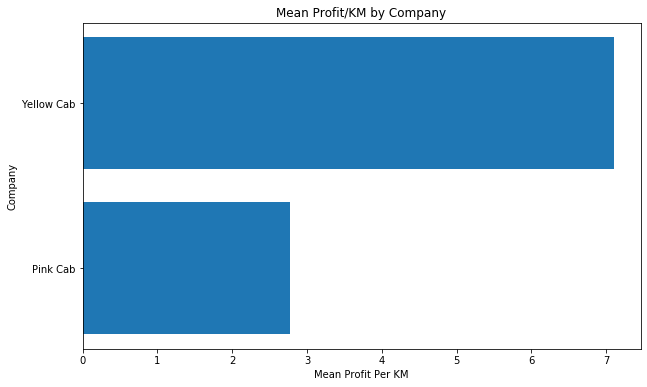

In [13]:
# Sorting the mean profits in ascending order
AggProf = AggProfKM.sort_values(ascending=True)

# Plotting the mean profits for each company as a horizontal bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
plt.barh(AggProf.index, AggProf.values)
plt.xlabel('Mean Profit Per KM')
plt.ylabel('Company')
plt.title('Mean Profit/KM by Company')
plt.show()

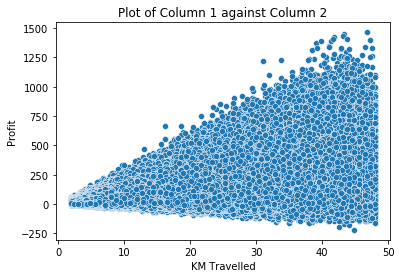

In [14]:
sns.scatterplot(data=cab_data, x='KM Travelled', y='Profit')
plt.xlabel('KM Travelled')
plt.ylabel('Profit')
plt.title('Plot of Column 1 against Column 2')
plt.show()

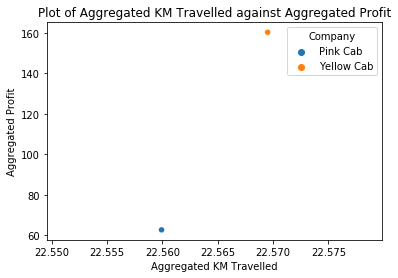

In [15]:
aggregated_data = cab_data.groupby('Company').mean()

# Plotting two aggregated columns against each other with colors and company names
sns.scatterplot(data=aggregated_data, x='KM Travelled', y='Profit', hue=aggregated_data.index)
plt.xlabel('Aggregated KM Travelled')
plt.ylabel('Aggregated Profit')
plt.title('Plot of Aggregated KM Travelled against Aggregated Profit')
plt.legend(title='Company')
plt.show()

In [16]:
AggCity = cab_data.groupby('City')['Profit'].mean().sort_values(ascending=True)
print(AggCity)

City
SACRAMENTO CA      49.567466
NASHVILLE TN       49.678478
BOSTON MA          59.568883
CHICAGO IL         59.820104
PITTSBURGH PA      64.863638
TUCSON AZ          72.636300
SEATTLE WA         75.613962
SAN DIEGO CA       77.467955
WASHINGTON DC      79.860762
LOS ANGELES CA     91.847452
PHOENIX AZ         93.479109
DENVER CO         103.943793
AUSTIN TX         107.577824
ATLANTA GA        111.477158
ORANGE COUNTY     114.766920
MIAMI FL          117.493220
SILICON VALLEY    154.561013
DALLAS TX         160.856957
NEW YORK NY       279.947491
Name: Profit, dtype: float64


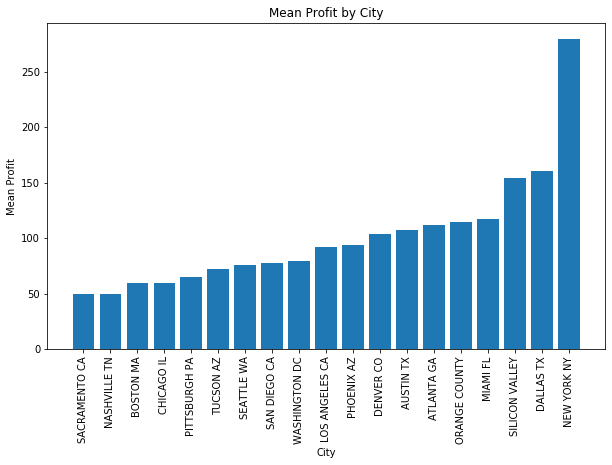

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(AggCity.index, AggCity.values)
plt.xlabel('City')
plt.ylabel('Mean Profit')
plt.title('Mean Profit by City')
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability
plt.show()

# Second dataset: city

In [18]:
city_data=pd.read_csv("city.csv")

In [19]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [20]:
city_data.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,SAN FRANCISCO CA,"698,371","144,132"
freq,1,1,1


In [21]:
city_data.dtypes

City          object
Population    object
Users         object
dtype: object

In [22]:
city_data['Population'] = city_data['Population'].str.replace(',', '').astype(float)
city_data['Users'] = city_data['Users'].str.replace(',', '').astype(float)

city_data['Population'] = city_data['Population'].astype(float)
city_data['Users'] = city_data['Users'].astype(float)

In [23]:
city_data.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [24]:
city_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [25]:
city_data["PopulationPerUsers"] =  city_data["Users"] / city_data["Population"]

In [26]:
city_data.head()

,City,Population,Users,PopulationPerUsers
0,NEW YORK NY,8405837.0,302149.0,0.035945
1,CHICAGO IL,1955130.0,164468.0,0.084121
2,LOS ANGELES CA,1595037.0,144132.0,0.090363
3,MIAMI FL,1339155.0,17675.0,0.013199
4,SILICON VALLEY,1177609.0,27247.0,0.023138


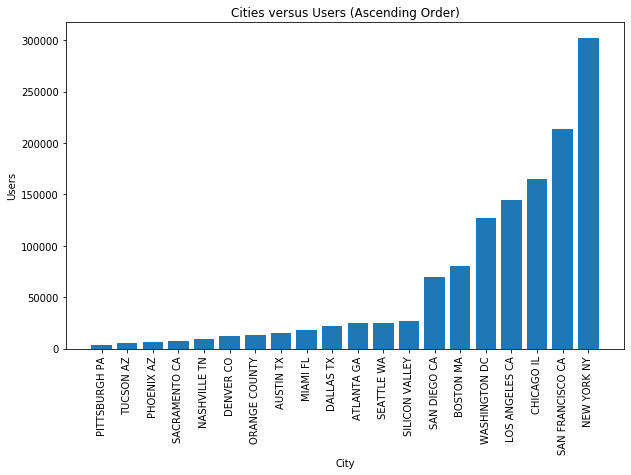

In [27]:
city_data_sorted = city_data.sort_values('Users')

# Plotting the cities versus PopulationPerUsers in ascending order
plt.figure(figsize=(10, 6))
plt.bar(city_data_sorted['City'], city_data_sorted['Users'])
plt.xlabel('City')
plt.ylabel('Users')
plt.title('Cities versus Users (Ascending Order)')
plt.xticks(rotation=90)
plt.show()

# Third dataset: customer

In [28]:
customer_data=pd.read_csv("Customer_ID.csv")

In [29]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [30]:
customer_data.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [31]:
customer_data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [32]:
customer_data.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

# Fourth dataset: Transactions

In [33]:
transaction_data=pd.read_csv("Transaction_ID.csv")

In [34]:
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [35]:
transaction_data.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [36]:
transaction_data.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

# Merging Cab & City datasets

In [37]:
# Merge datasets based on the 'City' column
merged_data = cab_data.merge(city_data, on='City')

# Group by 'Company' and calculate the sum of 'Users'
company_users = merged_data.groupby('Company')['Users'].sum()

# Find the company with the maximum number of users
max_users_company = company_users.idxmax()

print("Company with maximum cab users:", max_users_company)

Company with maximum cab users: Yellow Cab


In [38]:
merged_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,ProfitPerKM,Population,Users,PopulationPerUsers
0,10000011,1/8/2016 0:00,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,814885.0,24701.0,0.030312
1,10000012,1/6/2016 0:00,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,814885.0,24701.0,0.030312
2,10000013,1/2/2016 0:00,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,3.049558,814885.0,24701.0,0.030312
3,10000014,1/7/2016 0:00,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,0.777751,814885.0,24701.0,0.030312
4,10000015,1/3/2016 0:00,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,1.929439,814885.0,24701.0,0.030312
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,1/8/2018 0:00,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,1.225000,418859.0,127001.0,0.303207
359388,10440104,1/4/2018 0:00,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,0.821667,418859.0,127001.0,0.303207
359389,10440105,1/5/2018 0:00,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,3.150270,418859.0,127001.0,0.303207
359390,10440106,1/5/2018 0:00,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,3.652500,418859.0,127001.0,0.303207


In [39]:
company_users

Company
Pink Cab      1.063892e+10
Yellow Cab    4.627640e+10
Name: Users, dtype: float64

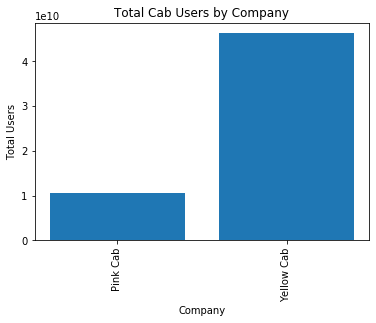

In [40]:
# Plotting the bar plot
plt.bar(company_users.index, company_users.values)
plt.xlabel('Company')
plt.ylabel('Total Users')
plt.title('Total Cab Users by Company')
plt.xticks(rotation=90)
plt.show()

In [41]:
merged_data2 = customer_data.merge(transaction_data, on='Customer ID')
merged_data2

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card
...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash
440094,14971,Male,30,15346,10439820,Card
440095,41414,Male,38,3960,10439838,Card
440096,41677,Male,23,19454,10439840,Cash


In [43]:
merged_data3 = merged_data.merge(merged_data2, on='Transaction ID')
merged_data3

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,ProfitPerKM,Population,Users,PopulationPerUsers,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,1/8/2016 0:00,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,814885.0,24701.0,0.030312,29290,Male,28,10813,Card
1,10000012,1/6/2016 0:00,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,814885.0,24701.0,0.030312,27703,Male,27,9237,Card
2,10000013,1/2/2016 0:00,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,3.049558,814885.0,24701.0,0.030312,28712,Male,53,11242,Cash
3,10000014,1/7/2016 0:00,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,0.777751,814885.0,24701.0,0.030312,28020,Male,23,23327,Cash
4,10000015,1/3/2016 0:00,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,1.929439,814885.0,24701.0,0.030312,27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,1/8/2018 0:00,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,1.225000,418859.0,127001.0,0.303207,52392,Male,24,15651,Cash
359388,10440104,1/4/2018 0:00,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,0.821667,418859.0,127001.0,0.303207,53286,Male,32,6528,Cash
359389,10440105,1/5/2018 0:00,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,3.150270,418859.0,127001.0,0.303207,52265,Male,56,7966,Cash
359390,10440106,1/5/2018 0:00,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,3.652500,418859.0,127001.0,0.303207,52175,Male,32,6423,Card


In [44]:
AggAge = merged_data3.groupby('Company')['Age'].mean().sort_values(ascending=True)
AggAge

Company
Pink Cab      35.322414
Yellow Cab    35.341112
Name: Age, dtype: float64

In [45]:
AggIncome = merged_data3.groupby('Company')['Income (USD/Month)'].mean().sort_values(ascending=True)
AggIncome

Company
Yellow Cab    15045.669817
Pink Cab      15059.047137
Name: Income (USD/Month), dtype: float64

In [46]:
# Group the data by company and calculate the mode of gender
company_gender1 = merged_data3.groupby('Company')['Gender'].agg(lambda x: x.mode()[0])

# Print the results
print(company_gender1)

Company
Pink Cab      Male
Yellow Cab    Male
Name: Gender, dtype: object


In [ ]:
# Group the data by company and calculate the mode of gender
company_gender1 = merged_data3.groupby('Company')['Gender'].agg(lambda x: x.mode()[0])

# Print the results
print(company_gender1)

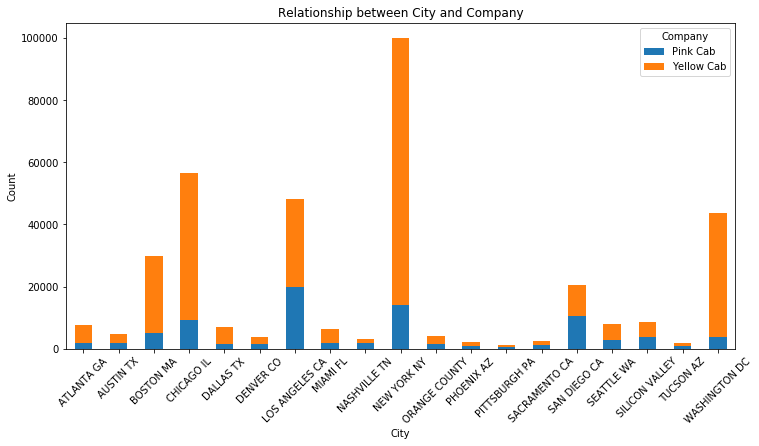

In [47]:
city_company_count = merged_data3.groupby(['City', 'Company']).size().unstack()

# Plotting the relationship between city and company
city_company_count.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Relationship between City and Company')
plt.legend(title='Company', loc='upper right')
plt.xticks(rotation=45)
plt.show()

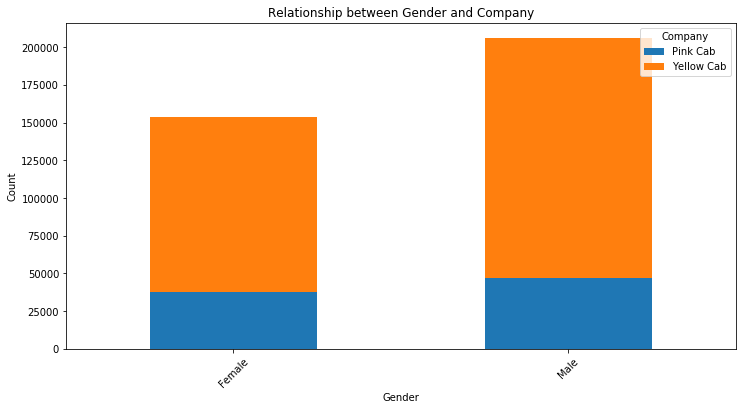

In [49]:
Gender_company_count = merged_data3.groupby(['Gender', 'Company']).size().unstack()

# Plotting the relationship between city and company
Gender_company_count.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Relationship between Gender and Company')
plt.legend(title='Company', loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [50]:
AggKM = merged_data3.groupby('Company')['KM Travelled'].sum()

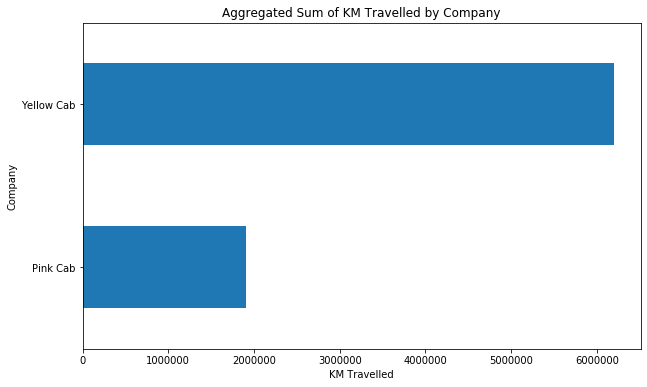

In [51]:
# Plotting the aggregated sum of 'KM Travelled' by company
AggKM.plot(kind='barh', figsize=(10, 6))
plt.xlabel('KM Travelled')
plt.ylabel('Company')
plt.title('Aggregated Sum of KM Travelled by Company')
plt.show()

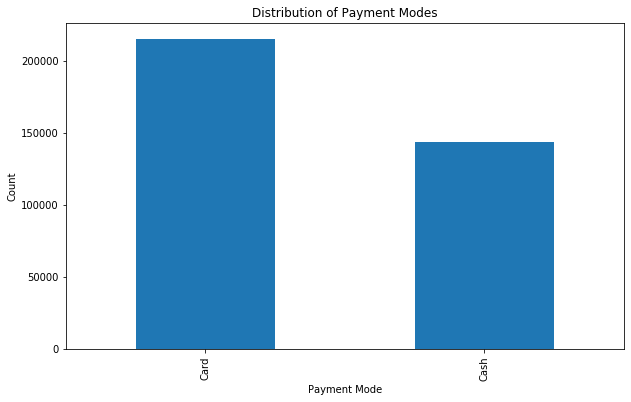

In [52]:
# Group the data by payment mode and calculate the count
payment_mode_count = merged_data3.groupby('Payment_Mode').size()

# Plotting the distribution of payment modes
payment_mode_count.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.title('Distribution of Payment Modes')
plt.show()

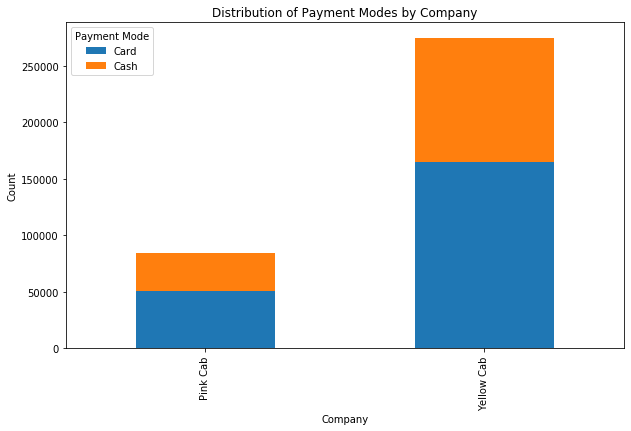

In [53]:
company_payment_mode_count = merged_data3.groupby(['Company', 'Payment_Mode']).size().unstack()

# Plotting the distribution of payment modes by company
company_payment_mode_count.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Distribution of Payment Modes by Company')
plt.legend(title='Payment Mode')
plt.show()